# Explore here

In [2]:
# LIBRERIAS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep=";")
total_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
total_data.shape

(41188, 21)

In [5]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Vemos que nuestro DataFrame tiene 5 filas cuyas variables son tipo flotante, 5 tipo entero y 11 tipo objeto, por los ingresos en cada columna podemos deducir que no hay valores nulos dentro de nuestro DataFrame.

In [6]:
total_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
total_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


Pueden haber valores duplicados por lo que procedemos a verificarlo.

In [8]:
total_data.duplicated().sum()
total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

vamos a dividir las columnas en categoricas y numericas.

In [18]:
num_cols = total_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = total_data.select_dtypes(include=['object']).columns.tolist()

print("Numéricas:", num_cols)
print("Categóricas:", cat_cols)

Numéricas: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_n', 'marital_n', 'education_n', 'default_n', 'housing_n', 'loan_n', 'month_n', 'day_of_week_n', 'poutcome_n', 'y_n']
Categóricas: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


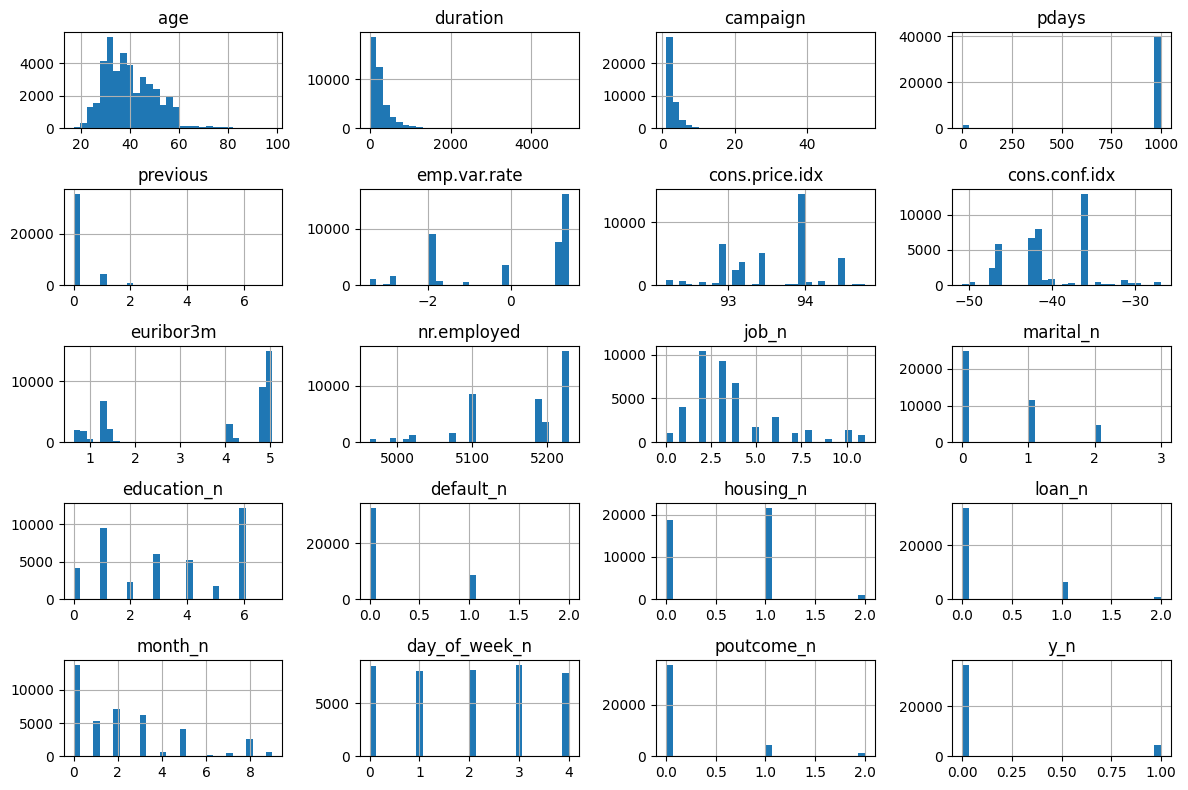

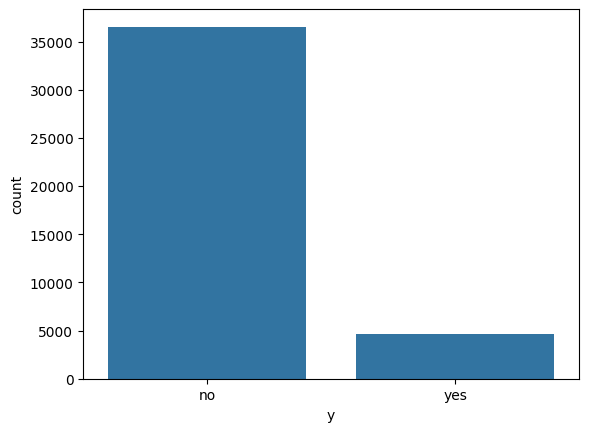

In [19]:
# Histogramas de variables numéricas
total_data[num_cols].hist(figsize=(12,8), bins=30)
plt.tight_layout()
plt.show()

# Conteo de la variable objetivo
sns.countplot(x="y", data=total_data)
plt.show()

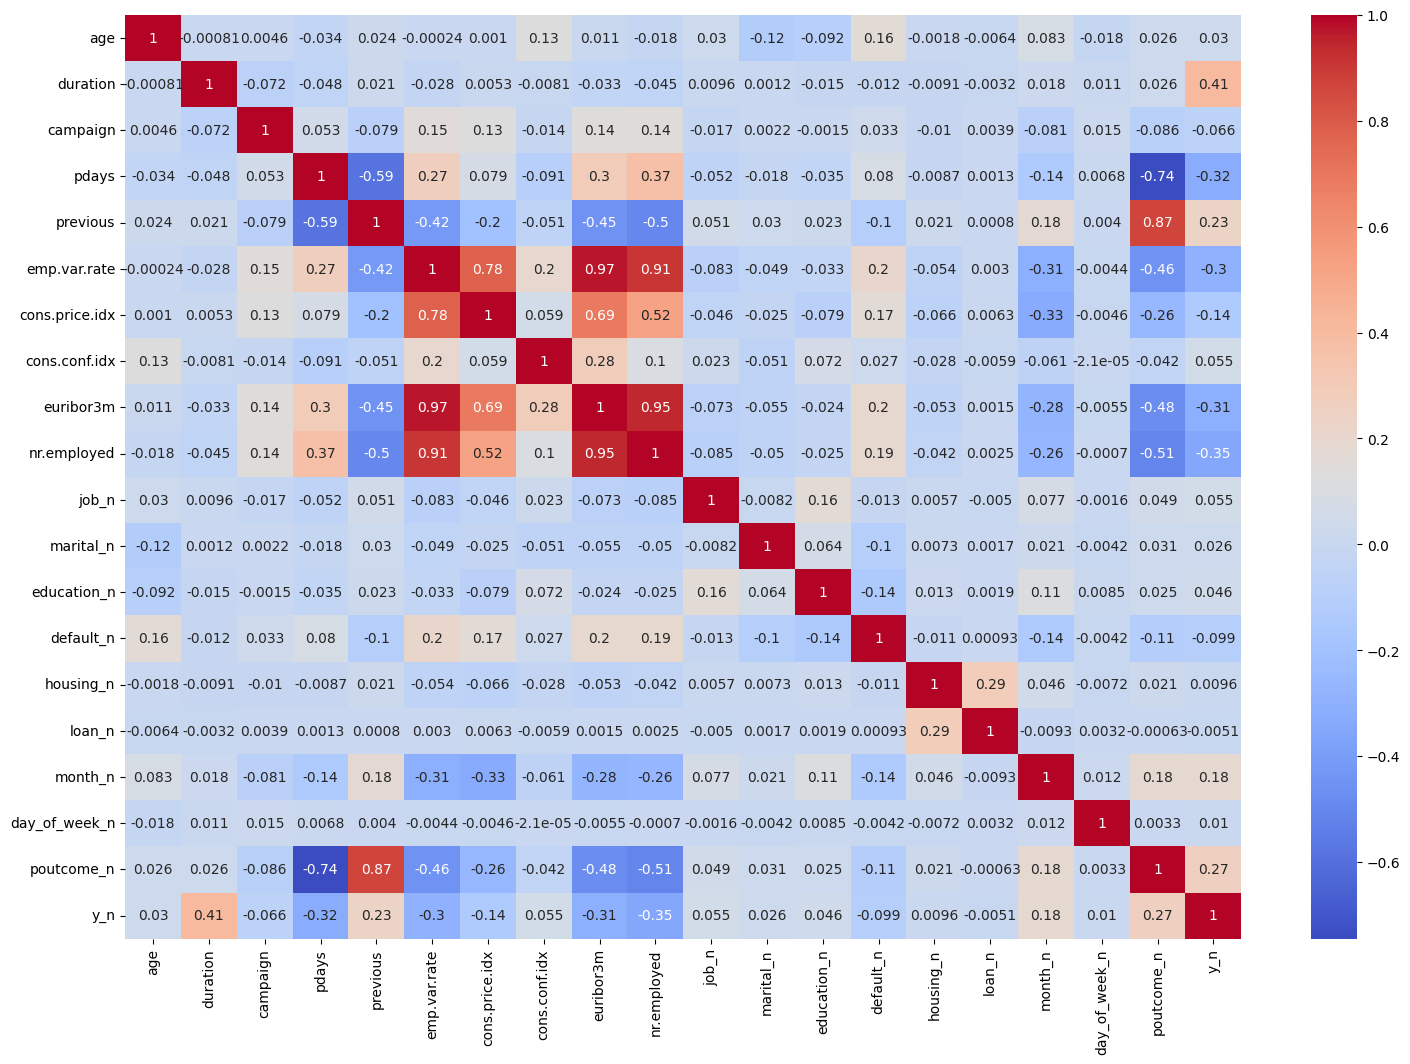

In [21]:
plt.figure(figsize=(18,12))
corr = total_data[num_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

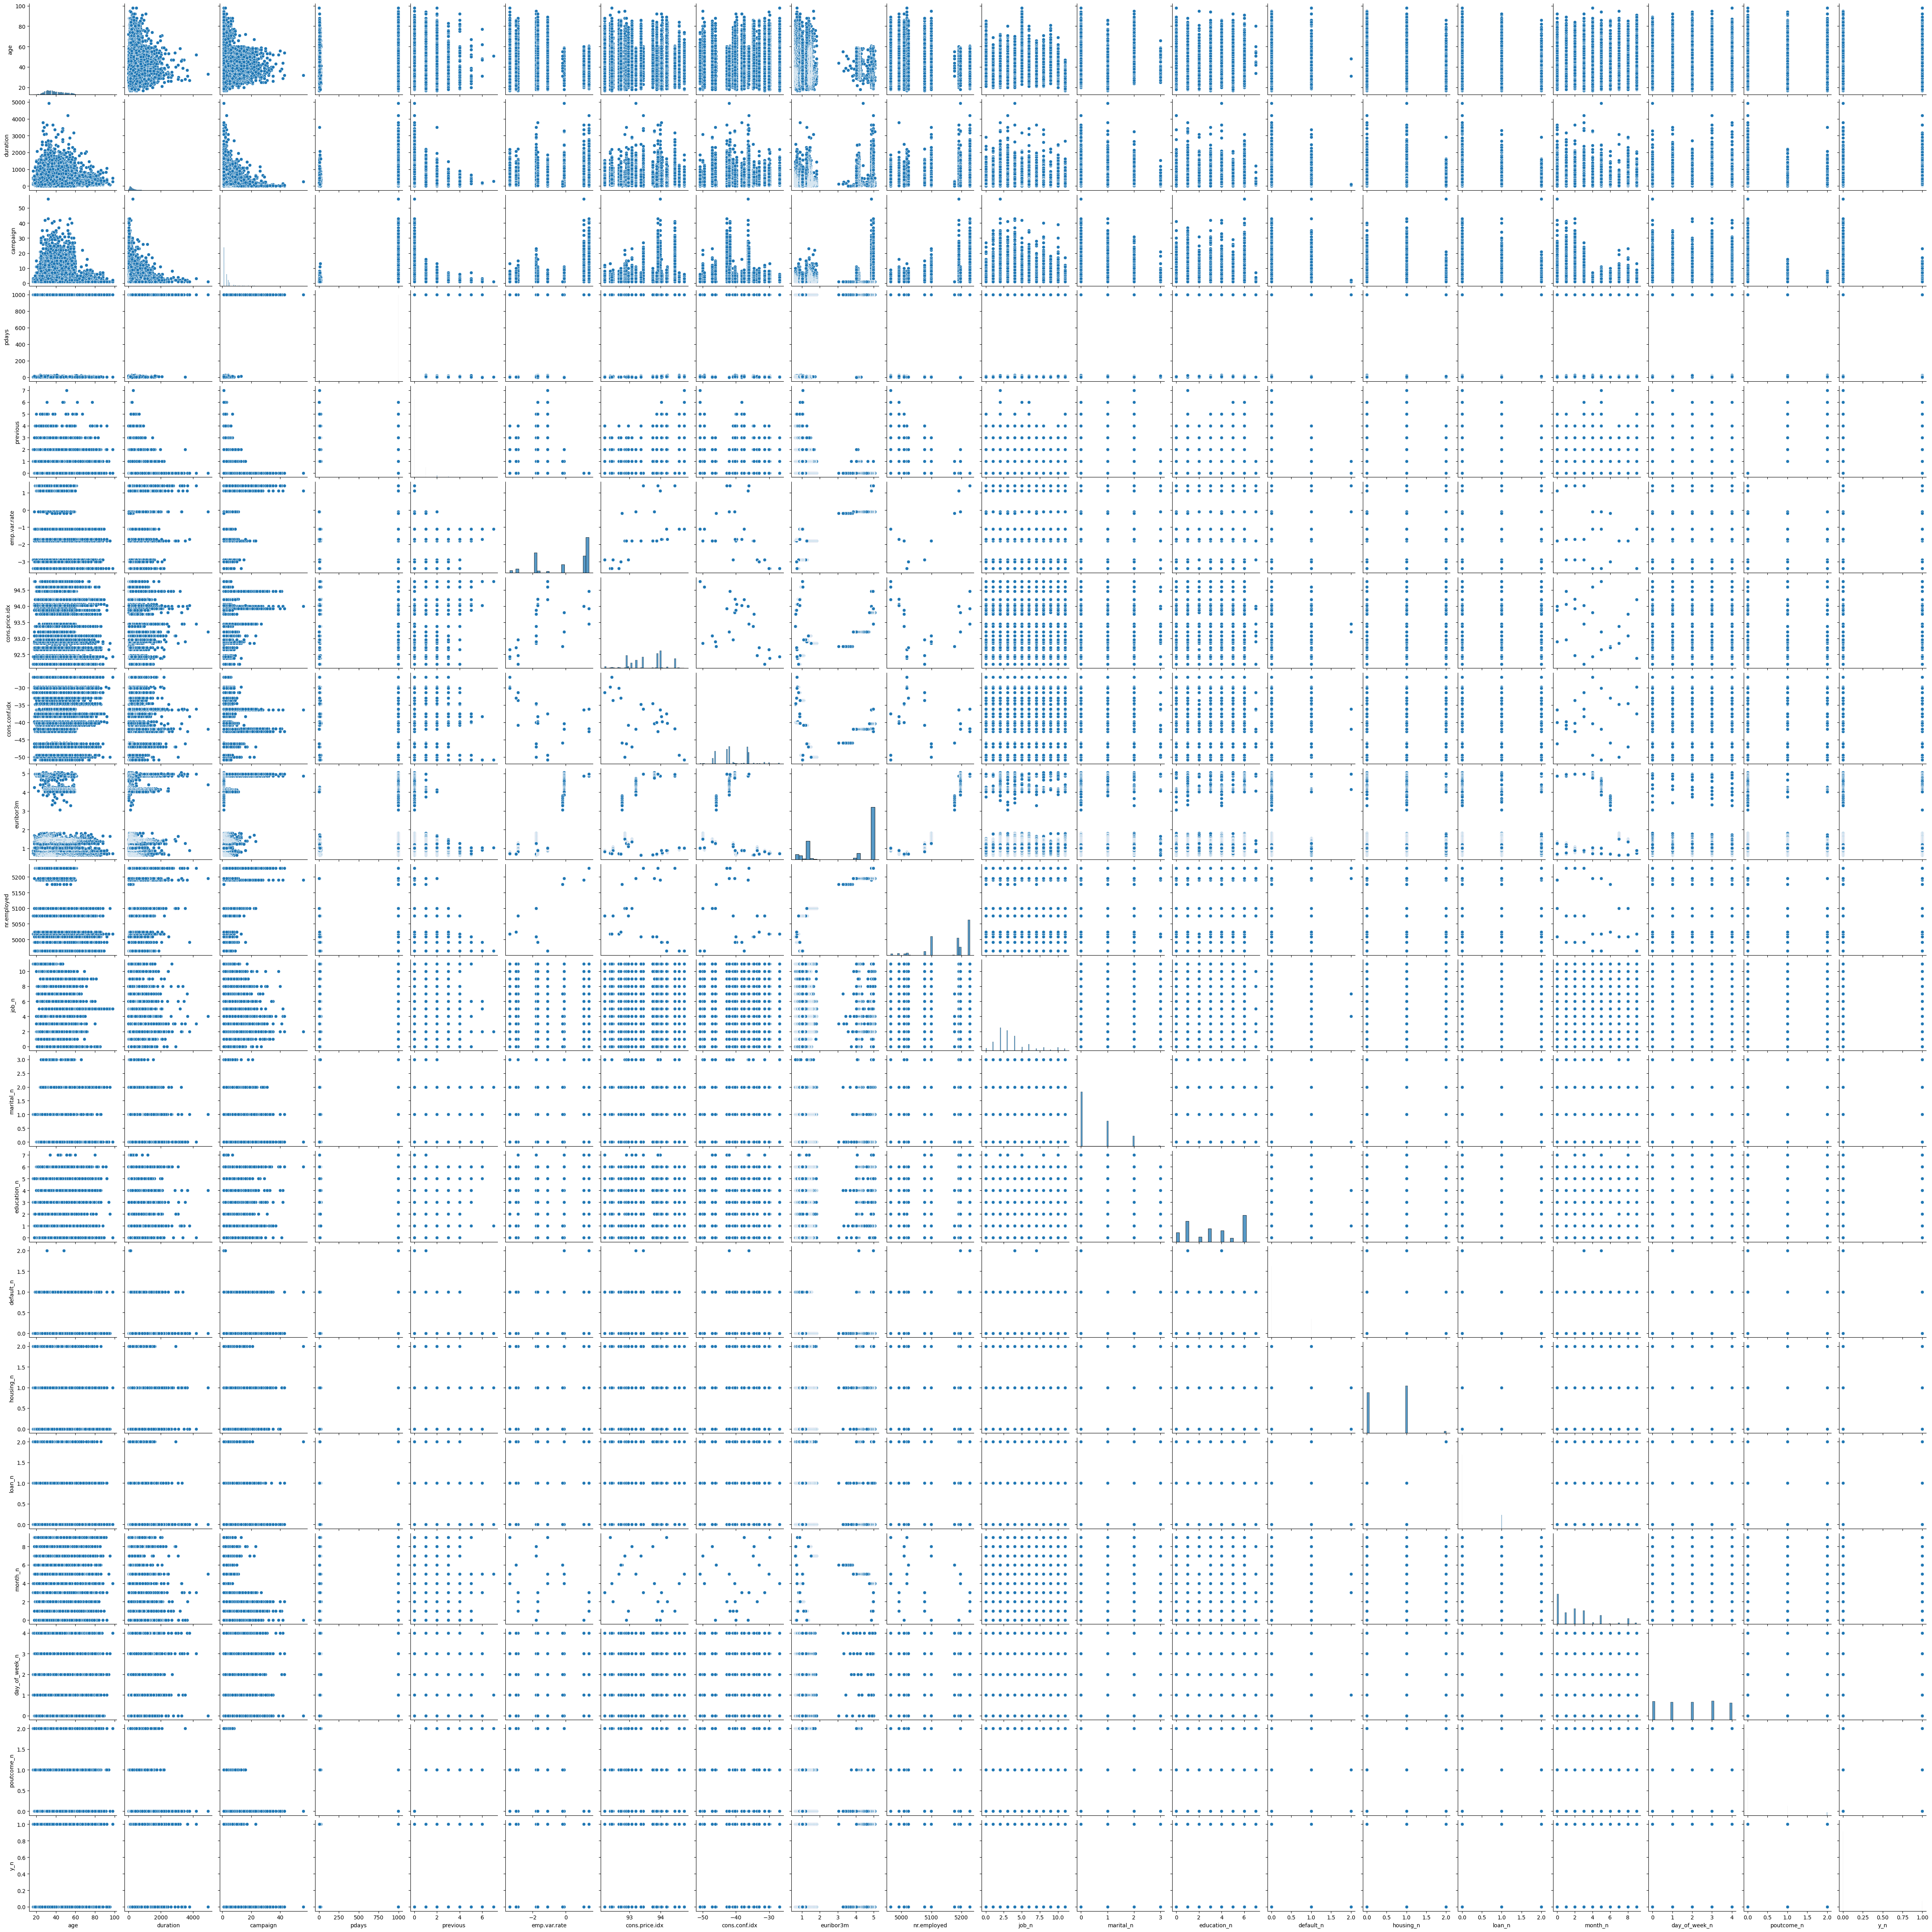

In [22]:
sns.pairplot(data = total_data)

Deteccion de Outliers

ValueError: num must be an integer with 1 <= num <= 12, not 13

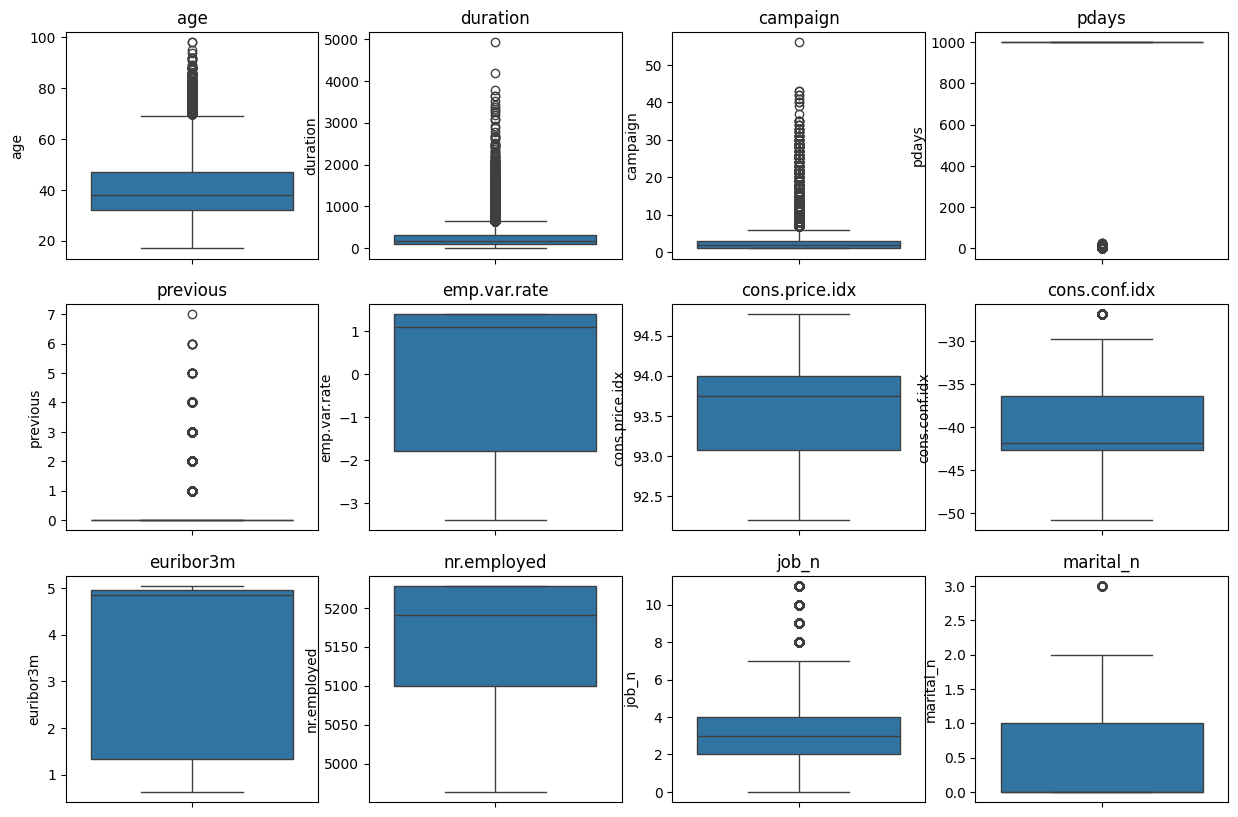

In [24]:
plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)  # Ajustar filas/columnas según cantidad de variables
    sns.boxplot(y=total_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Aqui procederemos a la deteccion de outliers por variables numericas.

In [23]:
num_cols = total_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Revisión de outliers por IQR
for col in num_cols:
    Q1 = total_data[col].quantile(0.25)
    Q3 = total_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    outliers_count = ((total_data[col] < lower_limit) | (total_data[col] > upper_limit)).sum()
    print(f"{col}: {outliers_count} outliers")

age: 468 outliers
duration: 2963 outliers
campaign: 2406 outliers
pdays: 1515 outliers
previous: 5625 outliers
emp.var.rate: 0 outliers
cons.price.idx: 0 outliers
cons.conf.idx: 446 outliers
euribor3m: 0 outliers
nr.employed: 0 outliers
job_n: 4082 outliers
marital_n: 80 outliers
education_n: 0 outliers
default_n: 8599 outliers
housing_n: 0 outliers
loan_n: 7238 outliers
month_n: 3201 outliers
day_of_week_n: 0 outliers
poutcome_n: 5625 outliers
y_n: 4639 outliers


Procedemos a eliminar los rangos de valores que son exageradamente altos en las variables numericas, excluyendo la columna pdays y la columna Y que puede ser relevante mas adelante para el analisis de los datos.

In [37]:
num_cols = total_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols.remove('pdays')
num_cols.remove('y_n')
# Copia para limpieza
total_data_clean = total_data.copy()

# Eliminar outliers por IQR
for col in num_cols:
    Q1 = total_data_clean[col].quantile(0.25)
    Q3 = total_data_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    total_data_clean = total_data_clean[(total_data_clean[col] >= lower_limit) & (total_data_clean[col] <= upper_limit)]

print("Shape original:", total_data.shape)
print("Shape limpio:", total_data_clean.shape)

# Comprobar que no quitamos 'pdays' especiales
print(total_data_clean['pdays'].value_counts().head())

Shape original: (41176, 31)
Shape limpio: (17328, 31)
pdays
999    17328
Name: count, dtype: int64


podemos ver que despues de la limpieza ha bajado significaticamente la cantidad de outliers.

In [39]:
import sklearn
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif

# 1️⃣ Variable objetivo
y = total_data_clean["y"]  # Aquí usamos la columna 'y' que dice si el cliente contrató el producto
X = total_data_clean.drop(columns=["y"])  # El resto de columnas como variables predictoras

# 2️⃣ Convertir variables categóricas a numéricas
X = pd.get_dummies(X, drop_first=True)

# 3️⃣ Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4️⃣ Seleccionar las 15 mejores variables
selector = SelectKBest(score_func=f_classif, k=15)
selector.fit(X_train, y_train)

# 5️⃣ Columnas seleccionadas
selected_columns = X_train.columns[selector.get_support()]
print("Variables seleccionadas:", selected_columns.tolist())

# 6️⃣ DataFrames con solo las variables seleccionadas
X_train_sel = X_train[selected_columns]
X_test_sel = X_test[selected_columns]

Variables seleccionadas: ['duration', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'default_n', 'month_n', 'y_n', 'job_retired', 'education_university.degree', 'default_unknown', 'contact_telephone', 'month_jun', 'month_may', 'month_nov', 'month_oct']


/home/vscode/.local/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [ 3  4 15 18 19] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/vscode/.local/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


realizamos el modelo re regresion logistica.

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Entrenar modelo
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3403    0]
 [   0   63]]
              precision    recall  f1-score   support

          no       1.00      1.00      1.00      3403
         yes       1.00      1.00      1.00        63

    accuracy                           1.00      3466
   macro avg       1.00      1.00      1.00      3466
weighted avg       1.00      1.00      1.00      3466

